## SME0828 - Introdução à Ciência de Dados

### Projeto Final - Detecção de Fraude em Transações Financeiras

##### Integrantes:
Ada Maris Pereira Mário ---- 12725432

Emanuel Victor da Silva Favorato ---- 12558151

Katiely Feitosa de Lacerda ---- 12777100

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

### Introdução

### Abertura e Preparação dos dados

In [ ]:
df = pd.read_csv('payment_fraud.csv', header=(0))
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,0
39217,1647,1,4.876771,creditcard,377.930556,0
39218,1591,1,4.742303,creditcard,0.000000,0
39219,237,1,4.921318,creditcard,236.082639,0


In [ ]:
df.shape

In [ ]:
df.info()

NameError: ignored

In [ ]:
# Verificando se existem valores NaN no arquivo.
nan = df.isna().sum()
nan

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

### Limpeza e normalização dos dados

In [ ]:
# Normalização
df2 = df.drop(columns='paymentMethod') # Derrubando a coluna de variáveis qualitativas.
X = np.array(df2[df2.columns[0:df2.shape[1]]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realizando a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)
rescaledX = pd.DataFrame(rescaledX)
rescaledX.columns = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays', 'label']
rescaledX

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
0,-1.029556,-0.1495,-0.007268,-0.333032,-0.120353
1,-0.164721,-0.1495,-0.015227,-0.432497,-0.120353
2,-0.015612,-0.1495,0.444546,-0.432497,-0.120353
3,-0.440574,-0.1495,0.355484,-0.432497,-0.120353
4,1.419567,-0.1495,0.751749,-0.432497,-0.120353
...,...,...,...,...,...
39216,0.159592,-0.1495,0.227942,-0.432497,-0.120353
39217,0.980936,-0.1495,0.330134,0.900283,-0.120353
39218,0.911352,-0.1495,-0.015227,-0.432497,-0.120353
39219,-0.771100,-0.1495,0.444546,0.400053,-0.120353


### Análise exploratória dos dados

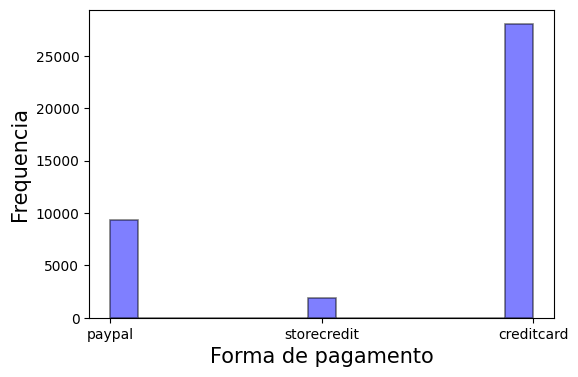

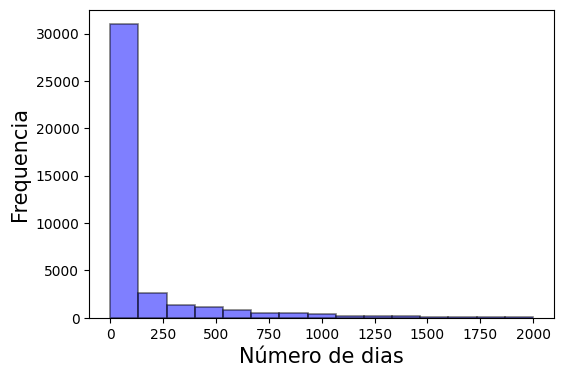

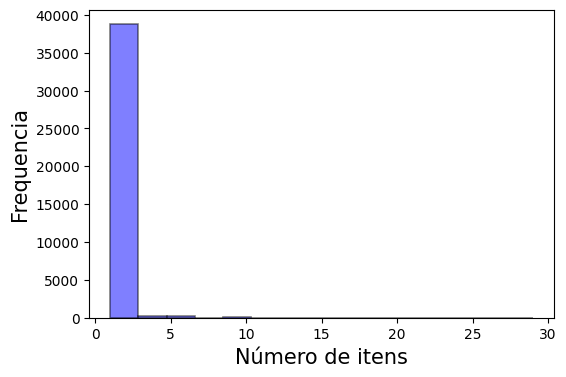

In [ ]:
# Observando algumas frequências
fig= plt.figure(figsize=(6,4))

num_bins = 15
n, bins, patches = plt.hist(df['paymentMethod'], num_bins, facecolor='blue', alpha=0.5, density=False, edgecolor='black', linewidth=1.2)
plt.xlabel("Forma de pagamento", fontsize = 15)
plt.ylabel("Frequencia", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

fig= plt.figure(figsize=(6,4))

num_bins = 15
n, bins, patches = plt.hist(df['paymentMethodAgeDays'], num_bins, facecolor='blue', alpha=0.5, density=False, edgecolor='black', linewidth=1.2)
plt.xlabel("Número de dias", fontsize = 15)
plt.ylabel("Frequencia", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

fig= plt.figure(figsize=(6,4))

num_bins = 15
n, bins, patches = plt.hist(df['numItems'], num_bins, facecolor='blue', alpha=0.5, density=False, edgecolor='black', linewidth=1.2)
plt.xlabel("Número de itens", fontsize = 15)
plt.ylabel("Frequencia", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

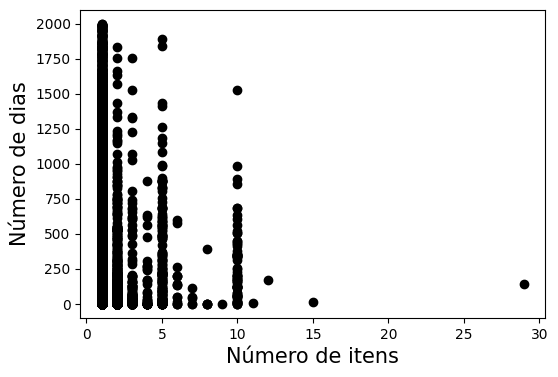

In [ ]:
# Gráfico de correlações
fig= plt.figure(figsize=(6,4))

plt.scatter(df['numItems'], df['paymentMethodAgeDays'], marker='o', color = 'black');
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Número de itens",fontsize = 15)
plt.ylabel("Número de dias", fontsize = 15)
plt.show(True)

<ipython-input-19-a23de075885f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True) # Mapa de calor, onde  annot insere os valores dentro das ilhas


<Axes: >

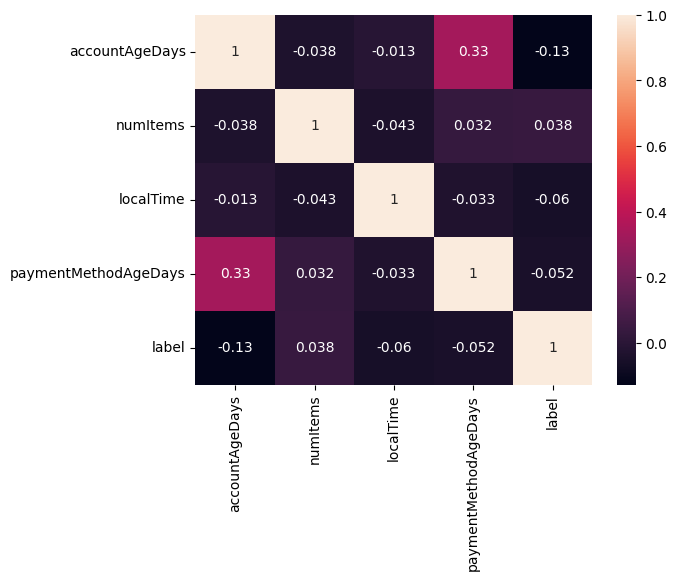

In [ ]:
sns.heatmap(df.corr(), annot = True) # Mapa de calor, onde  annot insere os valores dentro das ilhas

<Axes: >

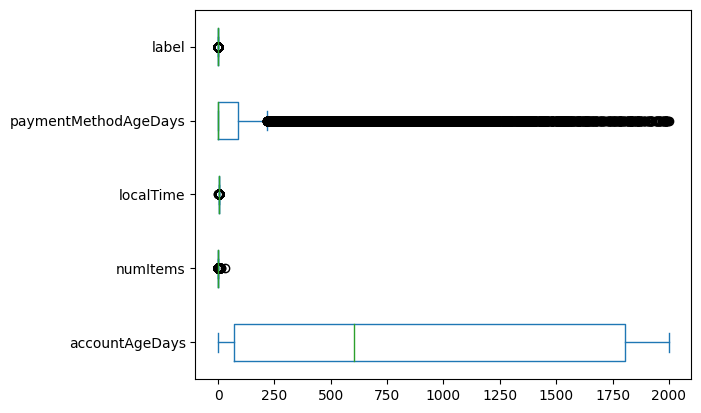

In [ ]:
df.plot.box(vert = False) # vert = False permite deitar o boxplot

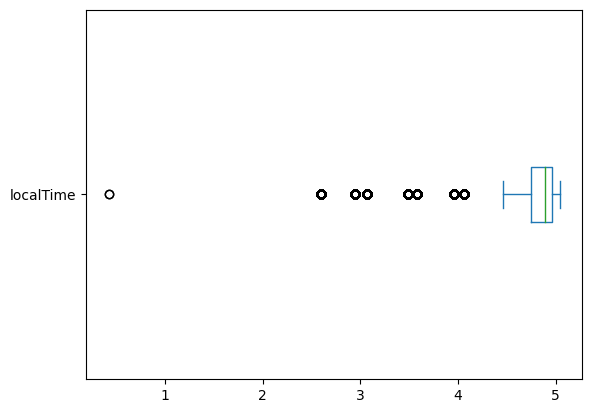

<Axes: >

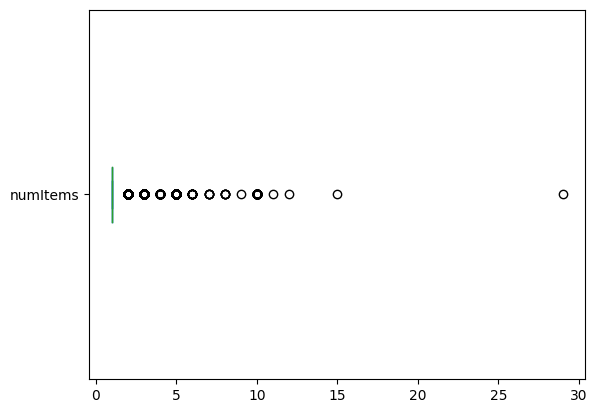

In [ ]:
# Plotando alguns boxplots separadamente para melhor análise dos dados
df['localTime'].plot.box(vert = False) # vert = False permite deitar o boxplot
plt.show()
df['numItems'].plot.box(vert = False)

### Modelagem

In [ ]:
# Conjuntos de treino e teste:

# Retira linhas do blog funcionando
dadosTreino = df.drop(
    df[df['numItems'] != 1 ].index,
    inplace=False
    )
dadosTreino.drop(columns=['numItems'],
                 inplace=True)

# Retira linhas em que o blog não está funcionando
dadosTeste = df.drop(
    df[df['numItems'] == 1 ].index,
    inplace=False
    )
dadosTeste.drop(columns=['numItems'],
                 inplace=True)

In [ ]:
dadosTreino

,accountAgeDays,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,4.745402,paypal,28.204861,0
1,725,4.742303,storecredit,0.000000,0
2,845,4.921318,creditcard,0.000000,0
3,503,4.886641,creditcard,0.000000,0
4,2000,5.040929,creditcard,0.000000,0
...,...,...,...,...,...
39216,986,4.836982,creditcard,0.000000,0
39217,1647,4.876771,creditcard,377.930556,0
39218,1591,4.742303,creditcard,0.000000,0
39219,237,4.921318,creditcard,236.082639,0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

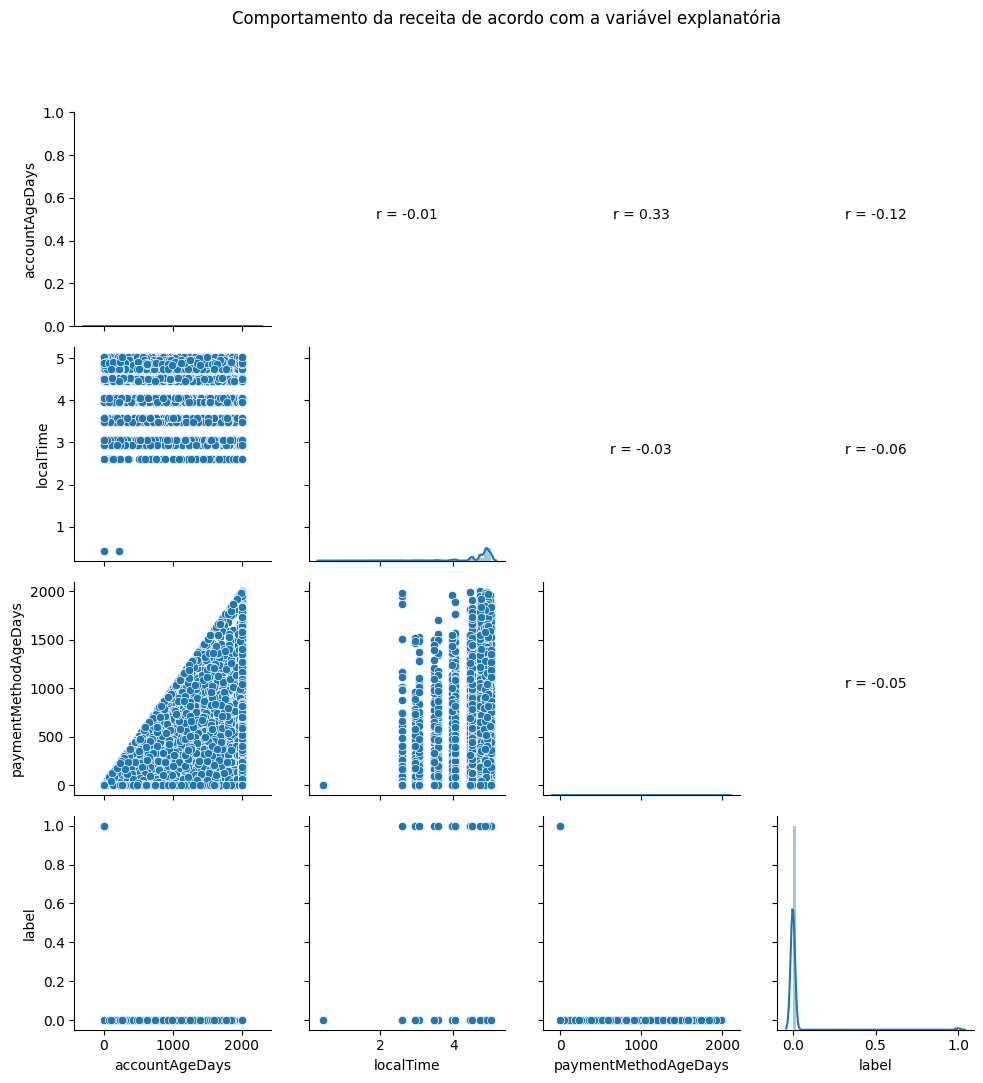

In [ ]:
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction',
                ha='center')
    ax.set_axis_off()

g = sns.PairGrid(dadosTreino)
g.fig.suptitle('Comportamento da receita de acordo com a variável explanatória',
               y=1.08)
g.map_diag(sns.distplot)
g.map_lower(sns.scatterplot )
g.map_upper(reg_coef)
plt.show()

Observa-se que a correlação entre as variáveis é fraca, |r| < 0.5, escolhendo aquelas que possuem maior correlação, obtemos o sequinte modelo de regressão linear:

In [ ]:
# Construindo um modelo de regressão para treino e teste
Y = dadosTreino['paymentMethodAgeDays']
X = dadosTreino['accountAgeDays']
X = sm.add_constant(X) # adicionar bias

X_teste = dadosTeste['accountAgeDays']
X_teste = sm.add_constant(X_teste) # adicionar bias
y_teste = dadosTeste['paymentMethodAgeDays']

model = sm.OLS(Y,X)
results = model.fit()

y_predictTeste = results.predict(X_teste)
y_predictTreino = results.predict(X)

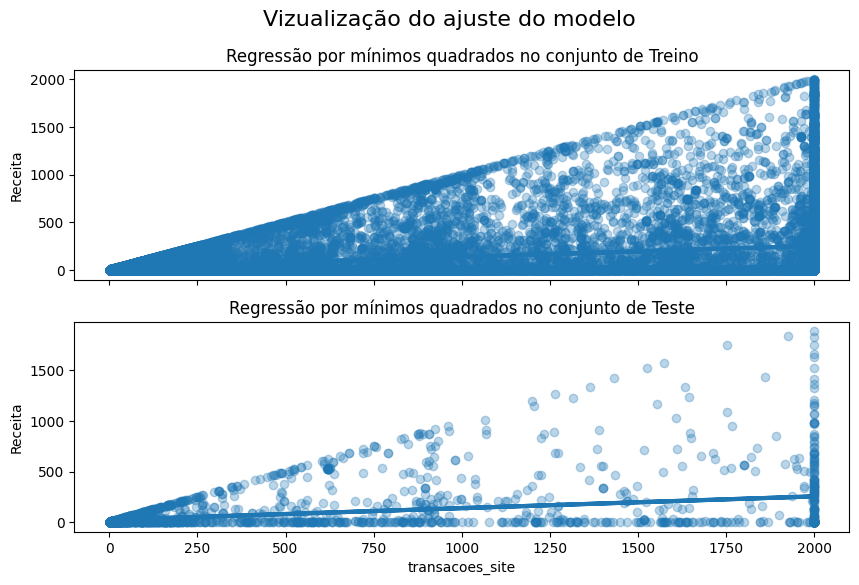

In [ ]:
fig4, axes4 = plt.subplots(2,1,figsize = (10,6),sharex=True)

axes4[0].scatter(dadosTreino['accountAgeDays'],dadosTreino['paymentMethodAgeDays'],
            alpha=0.3)

axes4[0].plot(dadosTreino['accountAgeDays'],y_predictTreino, linewidth=3)
axes4[0].set_ylabel('Receita')

axes4[0].set_title('Regressão por mínimos quadrados no conjunto de Treino')

axes4[1].scatter(dadosTeste['accountAgeDays'],dadosTeste['paymentMethodAgeDays'],
            alpha=0.3)

axes4[1].plot(dadosTeste['accountAgeDays'],y_predictTeste, linewidth=3)
axes4[1].set_xlabel('transacoes_site')
axes4[1].set_ylabel('Receita')

axes4[1].set_title('Regressão por mínimos quadrados no conjunto de Teste')

fig4.suptitle("Vizualização do ajuste do modelo", fontsize = 16)

plt.show()

### Considerações Finais